<a href="https://colab.research.google.com/github/jiashenyue/salary-insights/blob/main/Data_Science_Sales_Insights_Part2%2B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Sales Insights

Shenyue Jia | [jiashenyue.info](https://jiashenyue.info)

##Table of Content
- [0.About the data](##data)
- [1.Data Cleaning](##datacleaning)
- [2.Data Visualization](##datavisualization)

This table of content is not complete. Refer to this [Colab Notebook](https://colab.research.google.com/drive/1D4DOl95PduO3OtLhV30-JOvMYfNPmuO7?usp=sharing#scrollTo=02a610c9-5dad-4e9e-bb61-4141eb250081) for how to make the links work.

<a id="data"></a>
##0. About the data
The salary data for data scientist is collected and prepared by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/).

###Data dictionary
Variable Name  | Description
-------------------|------------------
Item_Identifier	| Unique product ID
Item_Weight	| Weight of product
Item_Fat_Content	| Whether the product is low fat or regular
Item_Visibility	| The percentage of total display area of all products in a store allocated to the particular product
Item_Type	| The category to which the product belongs
Item_MRP	| Maximum Retail Price (list price) of the product
Outlet_Identifier	| Unique store ID
Outlet_Establishment_Year	| The year in which store was established
Outlet_Size	| The size of the store in terms of ground area covered
Outlet_Location_Type	| The type of area in which the store is located
Outlet_Type	| Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	| Sales of the product in the particular store. This is the target variable to be predicted.

### Load data

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import pandas as pd
import numpy as np
file_url = '/content/drive/MyDrive/Coding-Dojo-Data-Science/project-1-data-science-salary-insights/data/sales_predictions.csv'

In [54]:
# load data
df = pd.read_csv(file_url)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<a name="datacleaning"></a>
##1. Data Cleaning

###1.1 How many rows and columns?
We can use `df.infor()` or `df.shape` to check how many rows and columns are in the dataframe.


*   Rows: `8523`
*   Coluums: `12`




In [55]:
# check out basic dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
# try another way
df.shape

(8523, 12)

###1.2 What are the datatypes of each variable?

In [57]:
# get variable types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###1.3 Are there duplicates? If so, drop any duplicates.
After checking with `df.duplicated()`, we found there is no duplicated rows in the dataframe.

In [58]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
print(f'There are {len(duplicateRows)} duplicated rows in the dataframe')

There are 0 duplicated rows in the dataframe


###1.4 Identify missing values.
We can use `isnull()` to check if there are any missing values. 


*   `Item_Weight` has `1463` missing values
*   `Outlet_Size` has `2410` missing values





In [59]:
# using isnull() function 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###1.5 Decide on how to address the missing values and do it!
We can check if there are any common patterns in the missing values. If not, we can utilize one of the missing data treatment to fill in the null values.

####1.5.1 Check `Item_Weight`

In [60]:
# take a look at the rows with a missing value
nullRowsItemWeight = df[df['Item_Weight'].isnull()]
nullRowsItemWeight.head().round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.13,Snack Foods,107.76,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.76
18,DRI11,NaN,Low Fat,0.03,Hard Drinks,113.28,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.67
21,FDW12,NaN,Regular,0.04,Baking Goods,144.54,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.04
23,FDC37,NaN,Low Fat,0.06,Baking Goods,107.69,OUT019,1985,Small,Tier 1,Grocery Store,214.39
29,FDC14,NaN,Regular,0.07,Canned,43.65,OUT019,1985,Small,Tier 1,Grocery Store,125.84


Since `Item_Weight` is a numeric field describing a characteristic of a certain type of goods, if we can get an idea on the average level of item weight, we may be able to backfill the missing values.

In [61]:
# calculate descriptive statistics on Item_Weight
df_stats = df.groupby('Item_Type')['Item_Weight'].describe().round(2)
df_stats

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,536.0,12.28,4.77,4.88,8.24,11.65,15.75,20.85
Breads,204.0,11.35,4.44,4.64,7.13,10.60,14.85,20.85
Breakfast,89.0,12.77,5.04,6.42,8.06,10.70,17.25,21.10
Canned,539.0,12.31,4.59,4.62,8.12,12.15,16.25,21.35
Dairy,566.0,13.43,4.69,4.80,9.28,13.35,17.60,20.70
Frozen Foods,718.0,12.87,4.51,4.56,8.94,12.85,17.00,20.85
Fruits and Vegetables,1019.0,13.22,4.58,5.46,9.20,13.10,17.10,21.35
Hard Drinks,183.0,11.40,4.24,4.61,8.26,10.10,14.85,19.70
Health and Hygiene,430.0,13.14,4.51,5.18,9.70,12.15,17.60,21.25


We can see if there is a big discrepancy between the median and the mean. This will give us better sense on if mean is a good value to backfill our missing values.

Creating histograms or perfoming hypothsis tesing would be better options in this case, but we can try these options later.

In [62]:
df_stats['diff'] = df_stats['mean'] - df_stats['50%']
df_stats

,count,mean,std,min,25%,50%,75%,max,diff
Item_Type,,,,,,,,,
Baking Goods,536.0,12.28,4.77,4.88,8.24,11.65,15.75,20.85,0.63
Breads,204.0,11.35,4.44,4.64,7.13,10.60,14.85,20.85,0.75
Breakfast,89.0,12.77,5.04,6.42,8.06,10.70,17.25,21.10,2.07
Canned,539.0,12.31,4.59,4.62,8.12,12.15,16.25,21.35,0.16
Dairy,566.0,13.43,4.69,4.80,9.28,13.35,17.60,20.70,0.08
Frozen Foods,718.0,12.87,4.51,4.56,8.94,12.85,17.00,20.85,0.02
Fruits and Vegetables,1019.0,13.22,4.58,5.46,9.20,13.10,17.10,21.35,0.12
Hard Drinks,183.0,11.40,4.24,4.61,8.26,10.10,14.85,19.70,1.30
Health and Hygiene,430.0,13.14,4.51,5.18,9.70,12.15,17.60,21.25,0.99


The calculate indicates the discrepancies between the mean and median are quite small. We can use the mean to backfill our missing values for `Item_Weight`.

In [63]:
# backfill values
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
# display the results compared to previous output
df.groupby('Item_Type')['Item_Weight'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,12.38,4.35,4.88,9.10,12.86,15.15,20.85
Breads,251.0,11.63,4.04,4.64,8.00,12.80,14.08,20.85
Breakfast,110.0,12.79,4.53,6.42,8.27,12.86,16.50,21.10
Canned,649.0,12.40,4.18,4.62,8.63,12.86,15.70,21.35
Dairy,682.0,13.33,4.27,4.80,10.80,12.86,16.74,20.70
Frozen Foods,856.0,12.87,4.13,4.56,9.30,12.86,16.10,20.85
Fruits and Vegetables,1232.0,13.16,4.16,5.46,10.17,12.86,16.35,21.35
Hard Drinks,214.0,11.61,3.95,4.61,8.37,11.23,14.65,19.70
Health and Hygiene,520.0,13.09,4.10,5.18,10.10,12.86,16.60,21.25


We can check if there are still missing values for `Item_Weight` or not.

In [64]:
# check missing values
df['Item_Weight'].isna().sum()

0

####1.5.2 Check `Outlet_Size`
The `Outlet_Size` field is related to the size of the sellers of products, such as grocery stores, supermarkets, etc.
We can compare several key measurements of the outlet, such as `Outlet_Location_Type`, `Outlet_Location_Type`, and `Item_Outlet_Sales` to see if we can make some judgement on what kind of outlets they may be.

In [65]:
# check what kind of data have missing values
nullRowsOutletSize = df[df['Outlet_Size'].isna()]
nullRowsOutletSize[['Item_Visibility','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']].round(2)

,Item_Visibility,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,0.00,Tier 3,Grocery Store,732.38
8,0.02,Tier 2,Supermarket Type1,1076.60
9,0.09,Tier 2,Supermarket Type1,4710.54
25,0.10,Tier 2,Supermarket Type1,838.91
28,0.16,Tier 3,Grocery Store,178.43
...,...,...,...,...
8502,0.07,Tier 2,Supermarket Type1,3020.07
8508,0.04,Tier 2,Supermarket Type1,2587.96
8509,0.21,Tier 3,Grocery Store,424.78
8514,0.05,Tier 2,Supermarket Type1,468.72


We can calculate descriptive stats of the rows with missing values of `Outlet_Size` and check how similar they are with other rows in the dataset.

In [66]:
nullRowsOutletSize.groupby(['Outlet_Location_Type']).median().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Location_Type,,,,,
Tier 2,12.5,0.05,141.92,2002.0,1946.80
Tier 3,12.6,0.09,143.91,1998.0,250.34


In [67]:
# check the basic characteristics all data
df.groupby(['Outlet_Location_Type','Outlet_Size']).median().round(2)

Item_Weight  Item_Visibility  Item_MRP  \
Outlet_Location_Type Outlet_Size                                           
Tier 1               Medium             12.65             0.05    141.82   
                     Small              12.86             0.06    143.81   
Tier 2               Small              12.55             0.05    145.98   
Tier 3               High               12.85             0.05    142.05   
                     Medium             12.86             0.05    142.02   

                                  Outlet_Establishment_Year  Item_Outlet_Sales  
Outlet_Location_Type Outlet_Size                                                
Tier 1               Medium                          1999.0            1966.11  
                     Small                           1997.0            1040.65  
Tier 2               Small                           2004.0            2109.25  
Tier 3               High                            1987.0            2050.66  
                     Medium                          1985.0            2350.94

There is no Tier 1 outlets in the `nullRowsOutletSize` dataframe. We can compare how similar the spects are in these values compared with the **Small** `Outlet_Size` in all our data.

Among all the numeric metrics, the `Item_Outlet_Sales` would be a good one to distinguish different types of `Outlet_Size` than other options we have here.

Median `Item_Outlet_Sales` **Tier 2 Small** outlets is `2109.25`, greater than the median `Item_Outlet_Sales` of **Tier 2** outlets in `nullRowsOutletSize` (`1946.80`).

For **Tier 3** outlets without `Outlet_Size`, they have a much smaller `Item_Outlet_Sales` than the **Tier 3 High** and **Tier 3 Medium** types (`250.34` vs. above `2000`. So we can consider assigning these rows to **Small** size as well.


We can compare the `mean` option to see if the same pattern persists.

In [68]:
# null rows mean
nullRowsOutletSize.groupby(['Outlet_Location_Type']).mean().round(2)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Outlet_Location_Type,,,,,
Tier 2,12.74,0.06,140.19,2004.5,2266.41
Tier 3,12.91,0.10,140.78,1998.0,339.35


In [69]:
# all data mean
df.groupby(['Outlet_Location_Type','Outlet_Size']).mean().round(2)

Item_Weight  Item_Visibility  Item_MRP  \
Outlet_Location_Type Outlet_Size                                           
Tier 1               Medium             12.92             0.06    140.30   
                     Small              12.86             0.08    141.24   
Tier 2               Small              12.83             0.06    143.12   
Tier 3               High               13.01             0.06    141.43   
                     Medium             12.87             0.06    140.74   

                                  Outlet_Establishment_Year  Item_Outlet_Sales  
Outlet_Location_Type Outlet_Size                                                
Tier 1               Medium                         1999.00            2348.35  
                     Small                          1992.65            1576.19  
Tier 2               Small                          2004.00            2438.84  
Tier 3               High                           1987.00            2299.00  
                     Medium                         1996.95            2847.96

Mean of `Item_Outlet_Sales` **Tier 2 Small** outlets is `2438.84`, greater than the mean of `Item_Outlet_Sales` of **Tier 2** outlets in `nullRowsOutletSize` (`2266.41`). This is persistent as we have observed in the median for **Tier 2** outlets.
**Tier 3** outlets also preserve the same pattern.

Therefore, we can assign the `Outlet_Size` of rows with

*   `'Outlet_Location_Type' == 'Tier 2'` to `Small`
*   `'Outlet_Location_Type' == 'Tier 3'` to `Small`

In [70]:
df.loc[(df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'
df.loc[(df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Size'].isna()), 'Outlet_Size'] = 'Small'

###1.6 Confirm that there are no missing values after addressing them.

In [71]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###1.7 Find and fix any inconsistent categories of data
We can check how many unique values are included in the categorical columns and correct the inconsistent categories.

In [72]:
# check column types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

We only need to focus on the columns that are `object` type. So we can create a new list for them.

In [73]:
data_types = df.dtypes
cols = data_types[data_types=='object'].index
cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

Once we identify these columns, we can go through each of them to extract unique values to check the inconsistent categories.

In [74]:
for col in cols:
 print(f"The unique values of the feature {col} are:\n")
 print(df[col].value_counts())
 print("\n")

The unique values of the feature Item_Identifier are:

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The unique values of the feature Item_Fat_Content are:

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The unique values of the feature Item_Type are:

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The unique values of the 

Here are some discrepancies we found after printing out the unique values for each column.


*   `reg` should be `Regular`
*   `low fat` should be `Low Fat`
*   `LF` should be `Low Fat`



We can fix them by replacing the corresponding rows.

In [75]:
# replace the inconsistent categories
df.replace(to_replace=['LF', 'low fat'], value='Low Fat', inplace=True)
df.replace('reg','Regular', inplace=True)

In [76]:
# show what the column looks like after correction
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###1.8 For any numerical columns, obtain the summary statistics of each (min, max, mean)
We can calculate the summary stats of each numeric columns.

In [77]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


 <a name="datavisualization"></a>
##2. Data Visualization
After data cleaning, we can create data visualization to better understand the pattern and trend in the data.

In [78]:
## Using three seaborn styles: seaborn-muted and seaborn-poster.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper")
# plt.style.use(['seaborn-muted', 'seaborn-poster'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


###2.1 Sales by Outlet Size
To help us understand the distribution of sales across different types (size) of outlets, we can create a series of histograms.

`Outlet_Size` contains the following unique values:

| Outlet_Size |
|-|
|Small|
|Medium|
|High|

In [80]:
# slice data for plotting
df_size = df[['Outlet_Size','Outlet_Location_Type','Item_Type','Item_Outlet_Sales','Item_Visibility']]
df_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Outlet_Size           8523 non-null   object 
 1   Outlet_Location_Type  8523 non-null   object 
 2   Item_Type             8523 non-null   object 
 3   Item_Outlet_Sales     8523 non-null   float64
 4   Item_Visibility       8523 non-null   float64
dtypes: float64(2), object(3)
memory usage: 333.1+ KB


To make it easier to compare across different outlet sizes, I used `seaborn.FacetGrid` to handle multi-panel graphs.

Some code is obtained from [seaborn manual](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

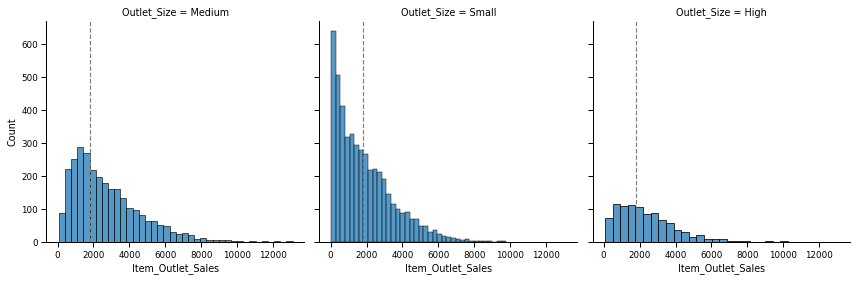

In [81]:
# create histograms for each outlet size
g = sns.FacetGrid(df_size, col="Outlet_Size",height = 4, aspect = 1)
g.map(sns.histplot, "Item_Outlet_Sales")
g.refline(x=df_size["Item_Outlet_Sales"].median())

The figure above indicated that regardless of outlet size, the medium of item sales is similar. Small outlets have more items with a low sales price. 

The high outlets have a lot less number of item because of the total number of `high` outlets is much smaller in our data.

###2.2 Sales by Outlet Location Type
We can also compare across different outlet types for item sales.

`Outlet_Location_Type` contains the following unique values:

| Outlet_Location_Type |
|-|
|Tier 3|
|Tier 2|
|Tier 1|

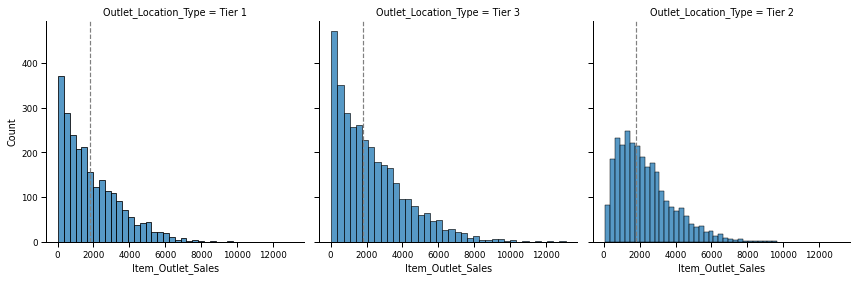

In [82]:
# create histograms for each outlet location type
g = sns.FacetGrid(df_size, col="Outlet_Location_Type",height = 4, aspect = 1)
g.map(sns.histplot, "Item_Outlet_Sales")
g.refline(x=df_size["Item_Outlet_Sales"].median())

The histogram of item sales amount by outlet location type indicated the similar pattern: the median of item sales is similar across outlet location types. 

In this comparison, Tier 3 outlets have a similar item sales pattern with Tier 1 outlets, but a lot more low item sales amount than Tier 2 outlets. This is different from the comparison between high, medium, and low outlet size.

###2.3 Sales by Outlet Size
To further compare the impact of outlet size across different types of items, we can create a series of box plots for different outlet size by each type of sales items.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


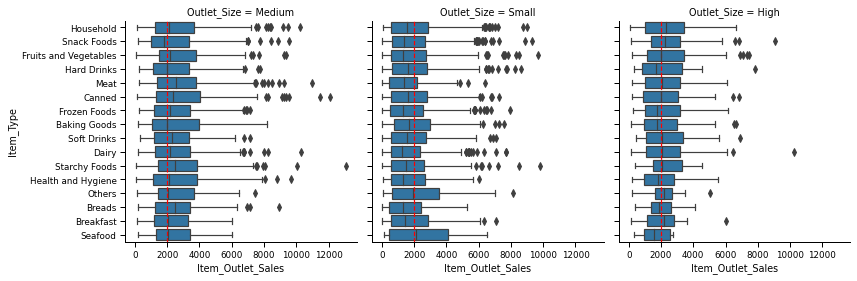

In [83]:
# boxplot of different types of items by outlet size
g = sns.FacetGrid(df_size, col="Outlet_Size",height = 4, aspect = 1);
g.map(sns.boxplot, 'Item_Outlet_Sales','Item_Type');
g.refline(x=2000,color="red")


The box plot above showed that the median sales amount at small outlets is lower than medium and high outlets, except the `Seafood` category.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


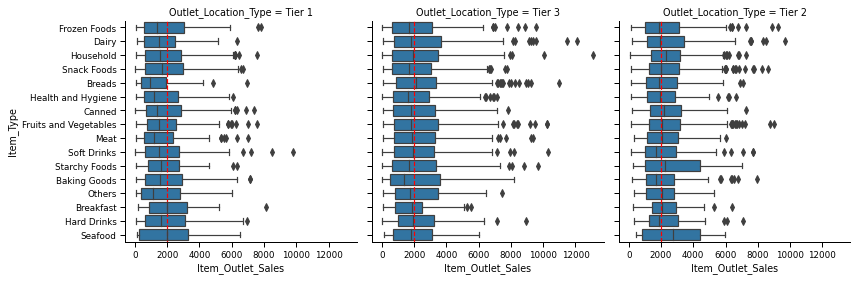

In [84]:
# boxplot of different types of items by outlet location type
g = sns.FacetGrid(df_size, col="Outlet_Location_Type",height = 4, aspect = 1);
g.map(sns.boxplot, 'Item_Outlet_Sales','Item_Type');
g.refline(x=2000,color="red")

Due to a much smaller number of Tier 1 cities, the median sales amount for almost all types of item in outlets of Tier 1 cities is smaller than Tier 2 and Tier 3.

#### **Tentative Conclusion 1**
To remove the impact of the number of cities at different tiers and the number of outlets at different sizes, comparing the share of item sales amount at each outlet would be a more reasonable way to reach more clear conclusion on how outlet size and outlet location type affect the item sales amount.

###2.4 Relationship between Item Sales Amount and Item Visibility

Hypothesis 1: A higher item visibility leads to greater item sales amount.

We can test this by showing the correlation between `Item_Visibility` and `Item_Outlet_Sales`.

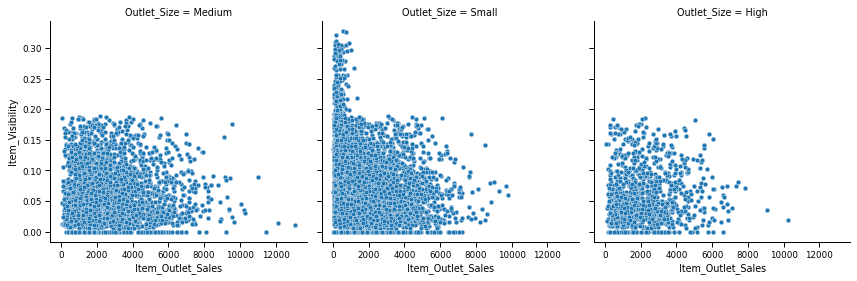

In [85]:
g = sns.FacetGrid(df_size, col="Outlet_Size",height = 4, aspect = 1);
g.map(sns.scatterplot, 'Item_Outlet_Sales','Item_Visibility');
# g.refline(x=2000,color="red")

The scatterplot indicates that the `Item_Visibility` and `Item_Outlet_Sales` do not have any correlation if we do not distinguish between item types.

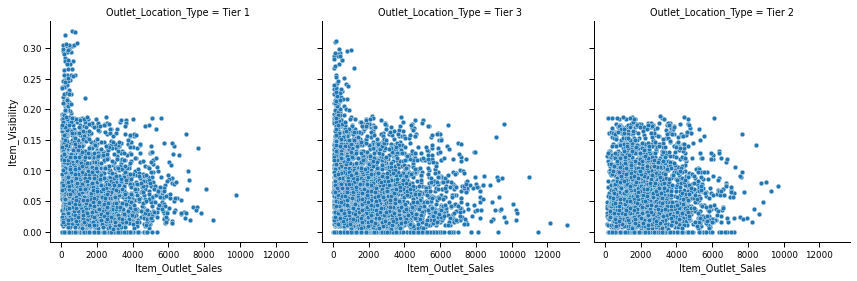

In [86]:
g = sns.FacetGrid(df_size, col="Outlet_Location_Type",height = 4, aspect = 1);
g.map(sns.scatterplot, 'Item_Outlet_Sales','Item_Visibility');

The scatterplot by outlet location types showed a similar pattern.

##2.5 Relationship between Sales Amount and All Numeric Variables

We can create a heatmap to get some understanding of the correlation between `Item_Outlet_Sales` and other numeric variables, including:

- `Item_Weight`
- `Item_Fat_Content`
- `Item_Visibility`
- `Item_MRP`

To improve the quality of the visualization, we can consider mask the upper triangle of the correlation matrix following directions from the [seaborn library document](http://seaborn.pydata.org/examples/many_pairwise_correlations.html).

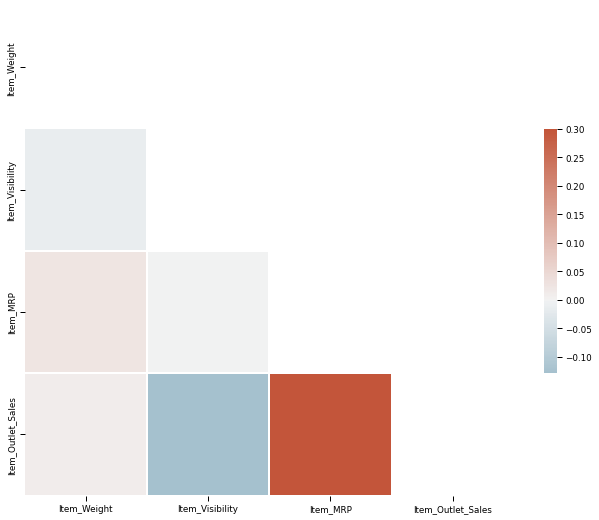

In [95]:
# obtain a dataframe for all numeric variables
df_num_corr = df[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Item_Outlet_Sales']]

# create a heatmap using seaborn
# Compute the correlation matrix
corr = df_num_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})